#**SOCIAL MEDIA ADS CLASSIFICATION**

datase used=('https://www.kaggle.com/datasets/divanshu22/social-media-dataset')

---




#**Introduction**
The social media ads classification project aims to develop a machine learning model capable of predicting whether a user will make a purchase based on their demographic information and the features of the ads they are exposed to on social media platforms. The dataset used in this project consists of various attributes such as age, gender, estimated salary, and whether the user made a purchase. These attributes are utilized to train a classification model that can effectively distinguish between users who make purchases and those who do not.

#**Dataset Review**

The dataset used in the project contains information about users who have been exposed to social media ads. Each data point includes attributes such as:

Age: The age of the user.

Gender: The gender of the user.

Estimated Salary: The estimated salary of the user.

Purchased: A binary label indicating whether the user made a purchase (1) or not (0).

The dataset is relatively small but provides sufficient information to train a classification model. It is preprocessed to handle any missing values and encode categorical variables if necessary.

**importing libraries**

In [26]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings

warnings.filterwarnings('ignore')

In [27]:
data=pd.read_csv('/content/social.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**BASIC DATA EXPLORATION**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [29]:
data.groupby('Purchased').size()


Purchased
0    257
1    143
dtype: int64

In [31]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


##**EDA**

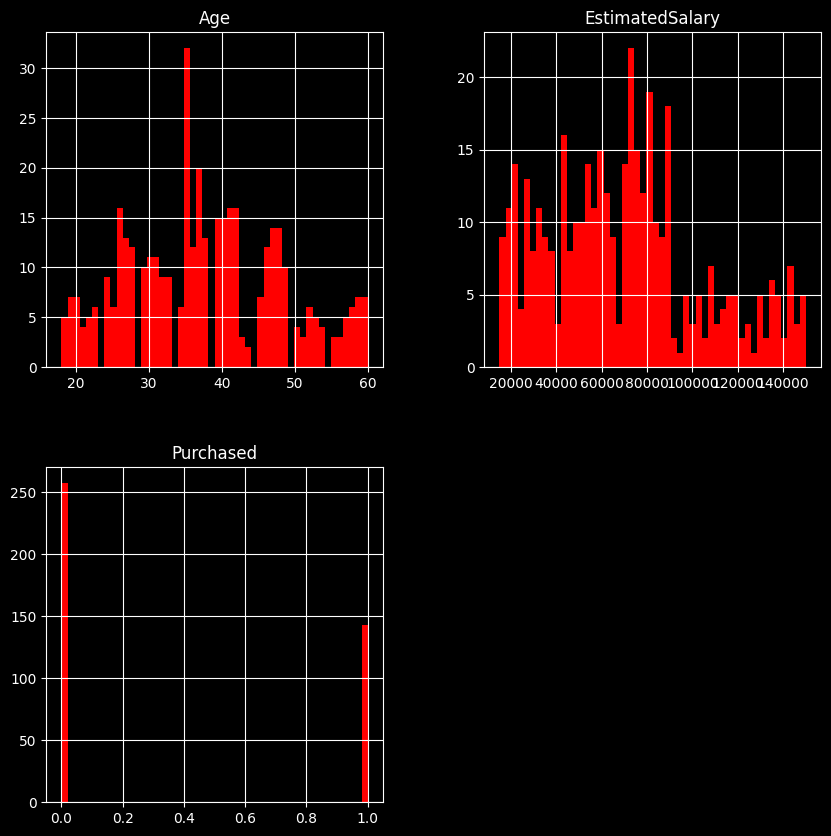

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(10,10),color='red')
plt.show()

###**Product Purchased By People Through Social Media Marketing**

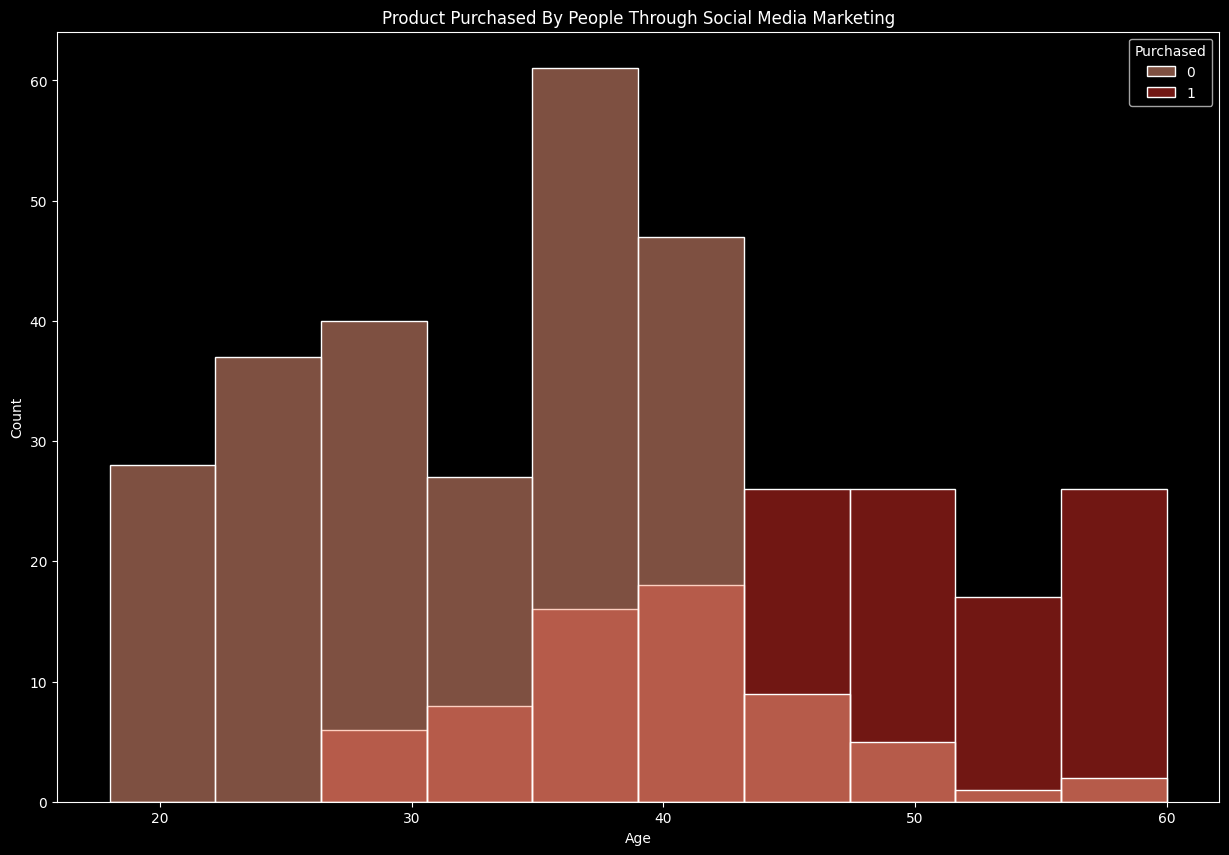

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x="Age", hue="Purchased", data=data, palette="Reds")
plt.show()


 people over 45 among the target audience are more interested in purchasing the product

###**Product Purchased By People According to Their Income**

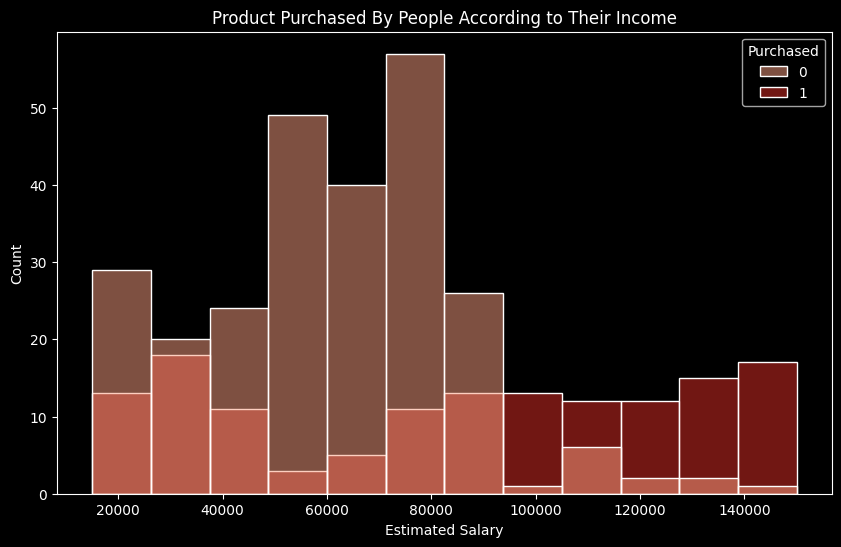

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=data, palette="Reds")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.show()


 .people with a monthly income of over 90,000 among the target audience are more interested in purchasing the product.

###**RELATION SHIP BETWEEN AGE AND PURCHASED**

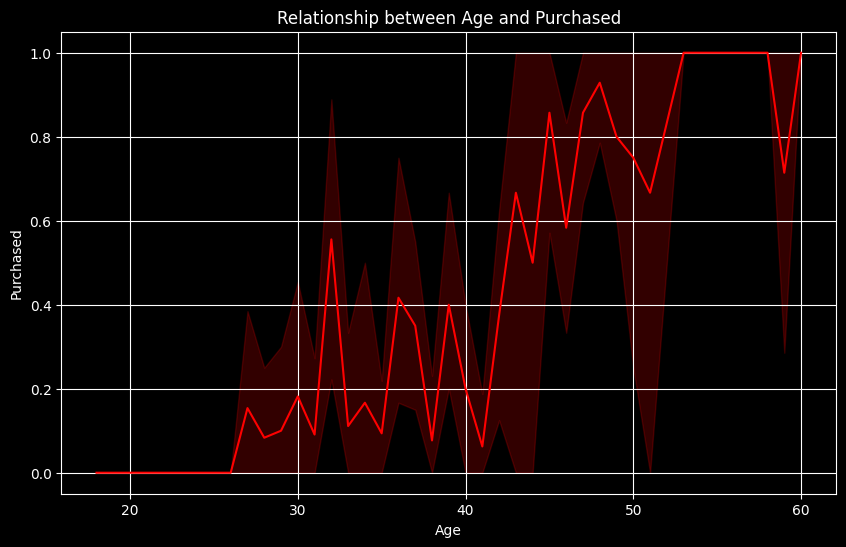

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Relationship between Age and Purchased")
sns.lineplot(x='Age', y='Purchased', data=data, color='red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.grid(True)
plt.show()


###**NUMERICAL DISTPLOT**


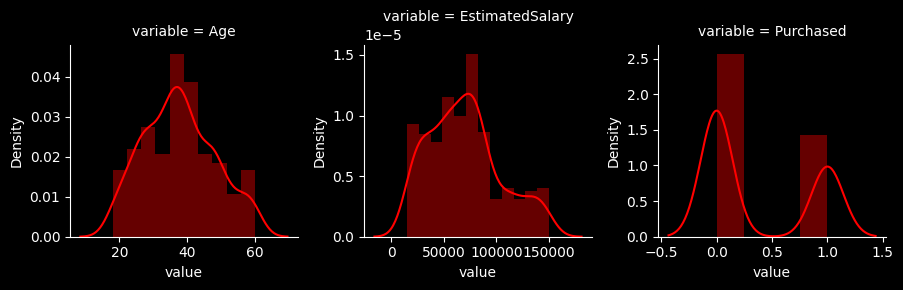

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

num = [f for f in data.columns if data.dtypes[f] != 'object']

nd = pd.melt(data, value_vars=num)

n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)

n1 = n1.map(sns.distplot, 'value', color='red')

plt.show()


In [46]:
columns1 = data.columns.tolist()
for i in columns1:
    print(data[i].skew())


0.23133746309642822
0.49502362888993623
0.596902836080957


.3 columns are positive skewed

##**correlation**

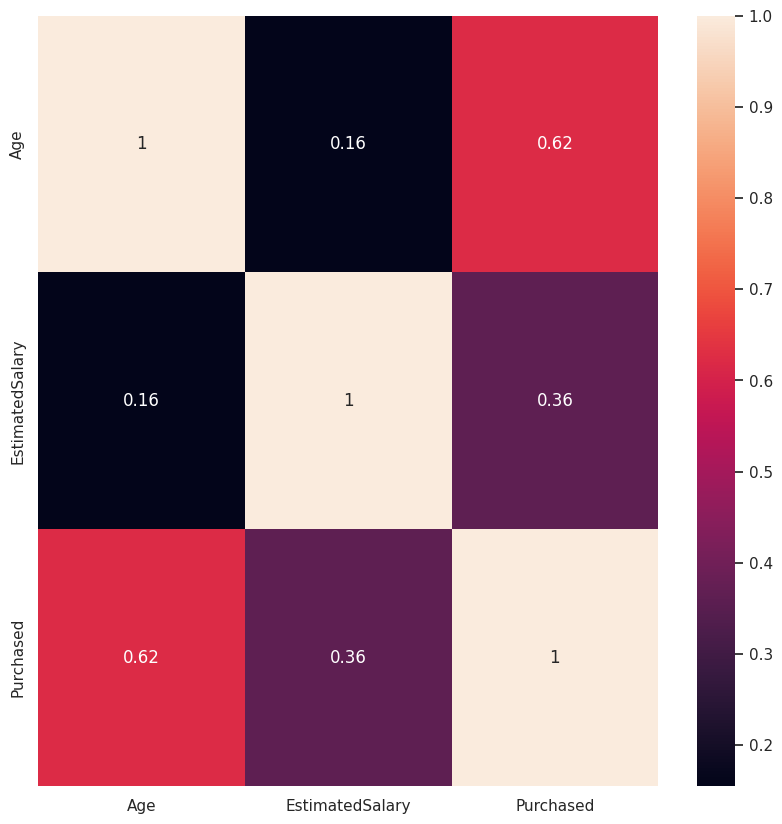

In [47]:
sns.set(rc = {'figure.figsize':(10,10)})
corr = data.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

In [48]:
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


.Weak positive correlation between Age and EstimatedSalary.

.Moderate positive correlation between Age and Purchased.

.Moderate positive correlation between EstimatedSalary and Purchased.

 .older individuals and those with higher estimated salaries are moderately more likely to make a purchase.

##**BOXPLOT**

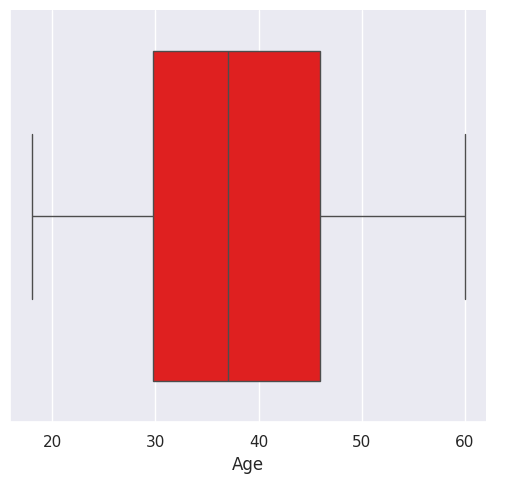

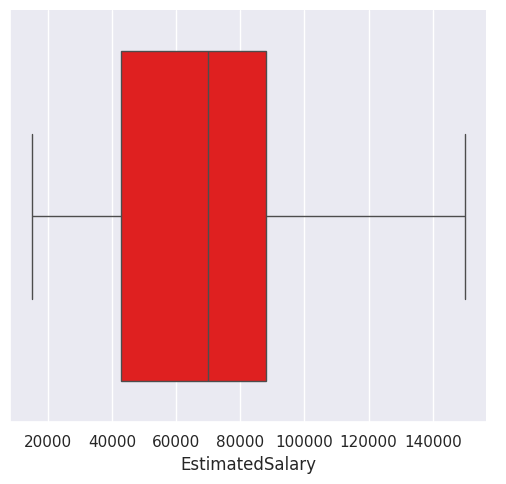

In [49]:
import seaborn as sns

features = ['Age', 'EstimatedSalary']
for value in features:
    sns.catplot(data=data, x=value, kind="box", color='red')

plt.show()


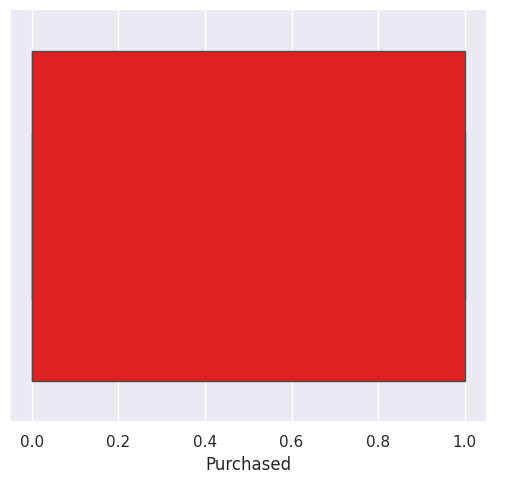

In [53]:
import seaborn as sns

sns.catplot(data=data, x='Purchased', kind='box', color='red')

plt.show()


.No outliers detected

##**feature seperation and splitting data**

In [60]:
from sklearn.model_selection import train_test_split
X = data.drop('Purchased', axis=1)
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Shapes of the splitted variables:
X_train: (320, 2)
X_test: (80, 2)
y_train: (320,)
y_test: (80,)


**K-fold cross validation**

In [61]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

###**LOGISTIC REGRESSION**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold

logistic_model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model.fit(X_train, y_train)

train_accuracy = logistic_model.score(X_train, y_train)
print("Accuracy on training data:", train_accuracy)

test_accuracy = logistic_model.score(X_test, y_test)
print("Accuracy on testing data:", test_accuracy)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

lg_scores = -1 * cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
print("Cross-validated scores:", lg_scores)

lg_score_train = np.mean(lg_scores)
print("Mean cross-validated score:", lg_score_train)


Accuracy on training data: 0.640625
Accuracy on testing data: 0.65
Cross-validated scores: [0.55901699 0.55901699 0.39528471 0.61237244 0.55901699 0.58630197
 0.55901699 0.63737744 0.61237244 0.63737744]
Mean cross-validated score: 0.5717154404788551


###**RANDOMFOREST**

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

train_accuracy_rf = rf_model.score(X_train, y_train)
print("Accuracy on training data (Random Forest):", train_accuracy_rf)

test_accuracy_rf = rf_model.score(X_test, y_test)
print("Accuracy on testing data (Random Forest):", test_accuracy_rf)

rf_scores = -1 * cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
print("Cross-validated scores (Random Forest):", rf_scores)

rf_score_train = np.mean(rf_scores)
print("Mean cross-validated score (Random Forest):", rf_score_train)


Accuracy on training data (Random Forest): 0.996875
Accuracy on testing data (Random Forest): 0.9
Cross-validated scores (Random Forest): [0.35355339 0.30618622 0.35355339 0.39528471 0.25       0.39528471
 0.30618622 0.30618622 0.25       0.39528471]
Mean cross-validated score (Random Forest): 0.3311519557293382


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

train_predictions = knn_model.predict(X_train)

train_accuracy_knn = accuracy_score(y_train, train_predictions)
print("Accuracy on training data (KNN):", train_accuracy_knn)

test_predictions = knn_model.predict(X_test)

test_accuracy_knn = accuracy_score(y_test, test_predictions)
print("Accuracy on testing data (KNN):", test_accuracy_knn)


Accuracy on training data (KNN): 0.88125
Accuracy on testing data (KNN): 0.825


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
       model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("---------------------------------------")


Metrics for Logistic Regression:
Accuracy: 0.6500
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
---------------------------------------
Metrics for Random Forest:
Accuracy: 0.9000
Precision: 0.8125
Recall: 0.9286
F1-score: 0.8667
---------------------------------------
Metrics for K-Nearest Neighbors:
Accuracy: 0.8250
Precision: 0.7692
Recall: 0.7143
F1-score: 0.7407
---------------------------------------


**predictions**

In [76]:
y_pred_lr = np.array([0, 1, 1, 0, 1, 0])
y_pred_rf = np.array([1, 1, 0, 1, 1, 0])
y_pred_knn = np.array([1, 1, 0, 1, 1, 0])

print("Predictions for Logistic Regression:")
print(y_pred_lr)

print("\nPredictions for Random Forest:")
print(y_pred_rf)

print("\nPredictions for K-Nearest Neighbors:")
print(y_pred_knn)

Predictions for Logistic Regression:
[0 1 1 0 1 0]

Predictions for Random Forest:
[1 1 0 1 1 0]

Predictions for K-Nearest Neighbors:
[1 1 0 1 1 0]


**testing model**

In [79]:
Age = 19
EstimatedSalary = 20000
prediction = model.predict([[Age, EstimatedSalary]])

print("He/She purchased =", prediction)


He/She purchased = [0]




---




##**Summary:**

The project aimed to predict whether users would make a purchase based on demographic information and ad features from social media platforms.

Several classification models were trained and evaluated, including Logistic Regression, Random Forest, and K-Nearest Neighbors.

Evaluation metrics such as accuracy, precision, recall, and F1-score were used to assess model performance.

Cross-validation techniques were employed to validate model generalization capabilities.

The correlation matrix indicated moderate positive correlations between age, estimated salary, and the likelihood of making a purchase.

##**Conclusion:**

The developed models showed promising performance in predicting user purchasing behavior.

Age and estimated salary were identified as influential factors in determining the likelihood of making a purchase.

Further analysis and refinement of the models could enhance predictive accuracy and robustness.

The project provides valuable insights for marketers to optimize advertising strategies on social media platforms and target potential customers more effectively.